# Problema 2

A continuación se presenta la solución al problema 2 de la prueba

### En el último mes, han llegado muchos más registros de los que puede atender el equipo de crédito. Alguien sugirió crear un modelo para poder decidir a quien prestarle.

#### - ¿Crees que sea una buena idea? ¿ Por qué? Si la respuesta fue sí, ¿qué tipo de probema es según los datos que tienes? (Supervisado o No Supervisado)
Sí, pues esto puede ayudar a optimizar el trabajo y facilitar la tarea.

El problema se trata de un algoritmo supervisado, pues se tiene la respuesta a predecir, en este caso es 'Estatus_prestamo'

#### - Haz las transformaciones que necesites a los datos y desarrolla algún modelo.

A continuación se hace un análisis exploratorio de los datos, para posteriormente comenzar con las transformaciones y finalmente se proponen 3 modelos

#### - ¿Cómo sabes que es un buen modelo?

Se utilizaron diferentes métricas de evaluación al final de cada uno de los modelos.


In [1]:
#librerías que vamos a ocupar para la limpieza de datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#cargamos el dataset y lo desplegamos
data=pd.read_csv('https://raw.githubusercontent.com/resuelve/resuelve-ia-prueba/master/datos_prestamo.csv')
data.head()

,Unnamed: 0,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina


## Comenzamos con el análisis exploratorio

In [3]:
#comenzamos con un análisis exploratorio
data.describe()

,Unnamed: 0,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio
count,557.000000,557.000000,557.000000,536.000000,544.000000,510.000000
mean,278.000000,5478.807899,1685.644596,146.882463,342.220588,0.886275
std,160.936323,6331.507982,2946.151879,86.435191,61.877404,0.317789
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,139.000000,2882.000000,0.000000,100.000000,360.000000,1.000000
50%,278.000000,3812.000000,1302.000000,127.500000,360.000000,1.000000
75%,417.000000,5829.000000,2375.000000,170.000000,360.000000,1.000000
max,556.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            557 non-null    int64  
 1   Fecha_registro        557 non-null    object 
 2   Fecha_contacto        557 non-null    object 
 3   Id                    557 non-null    object 
 4   Genero                545 non-null    object 
 5   Casado                554 non-null    object 
 6   Dependientes          544 non-null    object 
 7   Educacion             557 non-null    object 
 8   Trabaja_para_el       530 non-null    object 
 9   Salario               557 non-null    int64  
 10  Salario_Pareja        557 non-null    float64
 11  Credito_pedido        536 non-null    float64
 12  Plazo_prestamo        544 non-null    float64
 13  Historial_crediticio  510 non-null    float64
 14  Area_vivienda         557 non-null    object 
 15  Estatus_prestamo      5

In [5]:
#revisamos los valores vacíos
data.isnull().sum()

Unnamed: 0                0
Fecha_registro            0
Fecha_contacto            0
Id                        0
Genero                   12
Casado                    3
Dependientes             13
Educacion                 0
Trabaja_para_el          27
Salario                   0
Salario_Pareja            0
Credito_pedido           21
Plazo_prestamo           13
Historial_crediticio     47
Area_vivienda             0
Estatus_prestamo          0
Asesor_asignado         117
dtype: int64

In [6]:

#retiramos las columnas que no son relevantes en el modelado
data.drop(columns=['Unnamed: 0','Fecha_contacto','Fecha_registro','Id'],inplace=True)
data

,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,Hombre,Si,3+,Graduado,No,4691,0.0,100.0,360.0,1.0,Semiurbana,Si,Dudley
1,Hombre,Si,2,No Graduado,No,3333,2000.0,99.0,360.0,NaN,Semiurbana,Si,Pablo
2,Mujer,No,0,Graduado,No,4000,2275.0,144.0,360.0,1.0,Semiurbana,Si,Dudley
3,Hombre,Si,0,Graduado,No,2058,2134.0,88.0,360.0,NaN,Urabana,Si,Ana
4,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Regina
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,Mujer,Si,0,Graduado,No,3166,0.0,36.0,360.0,1.0,Semiurbana,Si,Pablo
553,Hombre,Si,1,Graduado,No,8300,0.0,152.0,300.0,0.0,Semiurbana,No,NaN
554,Hombre,Si,2,Graduado,No,5391,0.0,130.0,360.0,1.0,Urabana,Si,Ana
555,Hombre,Si,2,No Graduado,No,3675,242.0,108.0,360.0,1.0,Semiurbana,Si,Pablo


In [7]:
#Columnas de tipo numéricas
data.columns[(data.dtypes !='object').values].tolist()

['Salario',
 'Salario_Pareja',
 'Credito_pedido',
 'Plazo_prestamo',
 'Historial_crediticio']

In [8]:
#Revisamos las columnas con valores categóricos
cat_columns = data.columns[(data.dtypes =='object').values].tolist()
cat_columns

['Genero',
 'Casado',
 'Dependientes',
 'Educacion',
 'Trabaja_para_el',
 'Area_vivienda',
 'Estatus_prestamo',
 'Asesor_asignado']

In [9]:
#Hacemos un conteo de los valores dentro de cada columna

for i in data.columns[(data.dtypes =='object').values].tolist():
    print(i,'\n')
    print(data[i].value_counts())
    print('-----------------------------------------------')

Genero 

Hombre    446
Mujer      99
Name: Genero, dtype: int64
-----------------------------------------------
Casado 

Si    368
No    186
Name: Casado, dtype: int64
-----------------------------------------------
Dependientes 

0     316
2      92
1      91
3+     45
Name: Dependientes, dtype: int64
-----------------------------------------------
Educacion 

Graduado       443
No Graduado    114
Name: Educacion, dtype: int64
-----------------------------------------------
Trabaja_para_el 

No    459
Si     71
Name: Trabaja_para_el, dtype: int64
-----------------------------------------------
Area_vivienda 

Semiurbana    217
Urabana       180
Rural         160
Name: Area_vivienda, dtype: int64
-----------------------------------------------
Estatus_prestamo 

Si    440
No    117
Name: Estatus_prestamo, dtype: int64
-----------------------------------------------
Asesor_asignado 

Ana         91
Pablo       89
Santiago    89
Regina      87
Dudley      84
Name: Asesor_asignado, dtype:

### Visualización gráfica de los datos

In [10]:
#COmenzamos con los datos numéricos
import seaborn as sns


D:\Anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


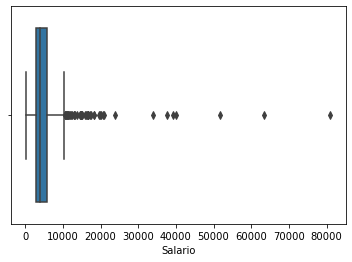

In [11]:
sns.boxplot(data['Salario'])

D:\Anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


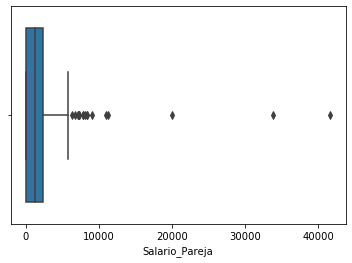

In [12]:
sns.boxplot(data['Salario_Pareja'])

D:\Anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


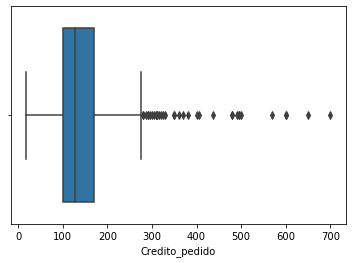

In [13]:
sns.boxplot(data['Credito_pedido'])

D:\Anaconda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


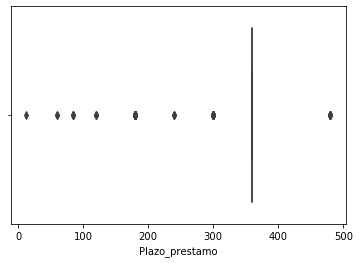

In [14]:
sns.boxplot(data['Plazo_prestamo'])

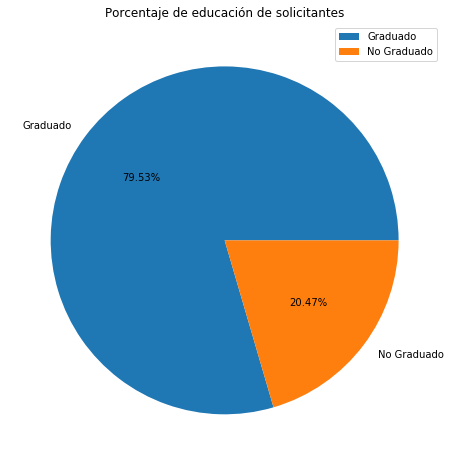

In [15]:
#Visualización de porcentajes en variables categóricas
plt.figure(figsize = (8,8))
plt.pie(data['Educacion'].value_counts(), labels=data['Educacion'].value_counts().index, autopct='%1.2f%%')
plt.title('Porcentaje de educación de solicitantes')
plt.legend()
plt.show()


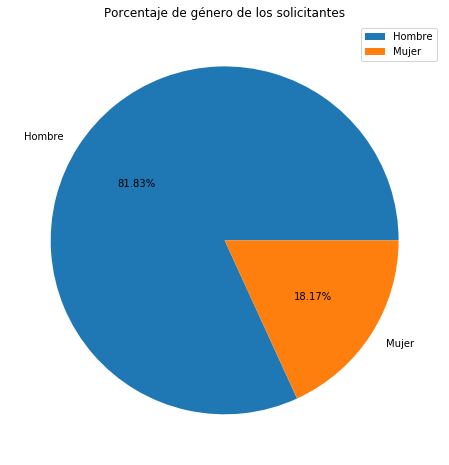

In [16]:
plt.figure(figsize = (8,8))
plt.pie(data['Genero'].value_counts(), labels=data['Genero'].value_counts().index, autopct='%1.2f%%')
plt.title('Porcentaje de género de los solicitantes')
plt.legend()
plt.show()

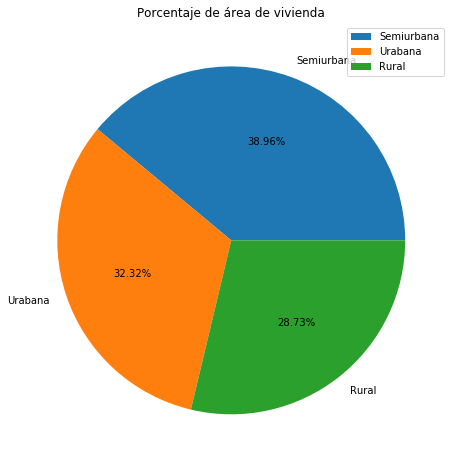

In [17]:
plt.figure(figsize = (8,8))
plt.pie(data['Area_vivienda'].value_counts(), labels=data['Area_vivienda'].value_counts().index, autopct='%1.2f%%')
plt.title('Porcentaje de área de vivienda')
plt.legend()
plt.show()

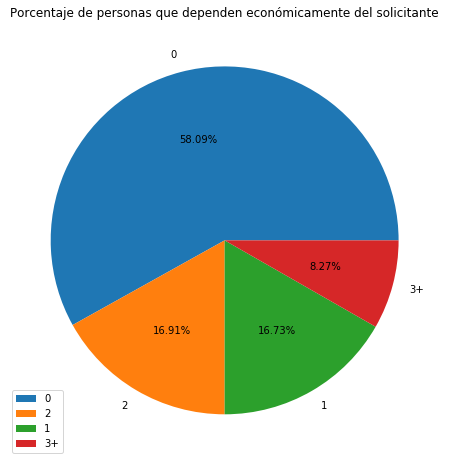

In [18]:
plt.figure(figsize = (8,8))
plt.pie(data['Dependientes'].value_counts(), labels=data['Dependientes'].value_counts().index, autopct='%1.2f%%')
plt.title('Porcentaje de personas que dependen económicamente del solicitante')
plt.legend()
plt.show()

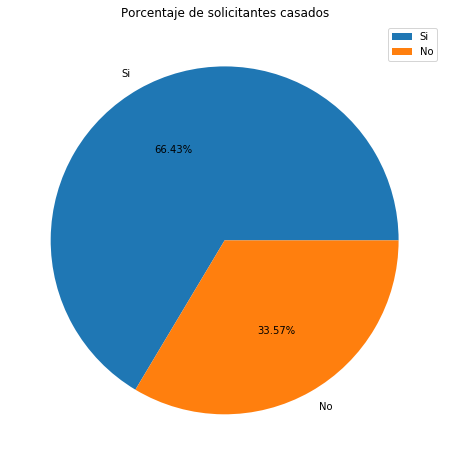

In [19]:
plt.figure(figsize = (8,8))
plt.pie(data['Casado'].value_counts(), labels=data['Casado'].value_counts().index, autopct='%1.2f%%')
plt.title('Porcentaje de solicitantes casados')
plt.legend()
plt.show()

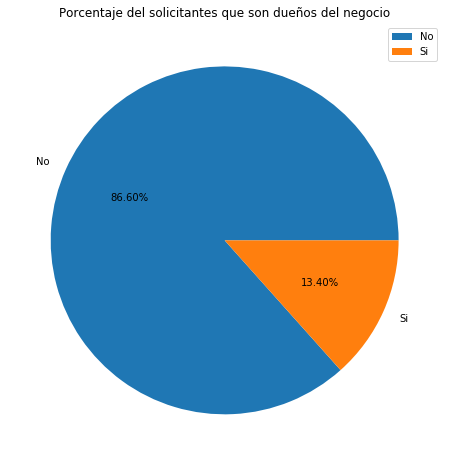

In [20]:
plt.figure(figsize = (8,8))
plt.pie(data['Trabaja_para_el'].value_counts(), labels=data['Trabaja_para_el'].value_counts().index, autopct='%1.2f%%')
plt.title('Porcentaje del solicitantes que son dueños del negocio')
plt.legend()
plt.show()

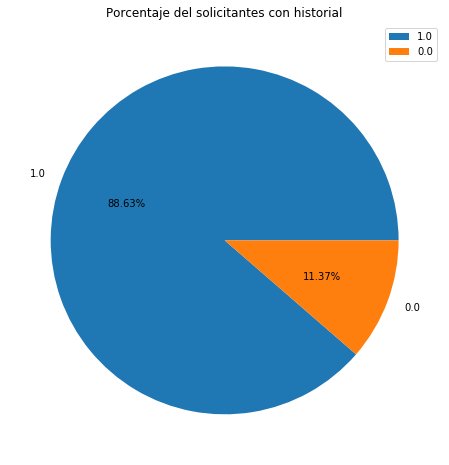

In [21]:
plt.figure(figsize = (8,8))
plt.pie(data['Historial_crediticio'].value_counts(), labels=data['Historial_crediticio'].value_counts().index, autopct='%1.2f%%')
plt.title('Porcentaje del solicitantes con historial')
plt.legend()
plt.show()

### Limpieza de datos

In [22]:
#Solucionamos valores faltantes en esta columna con el promedio
data['Credito_pedido'].fillna(data['Credito_pedido'].mean(), inplace=True)

In [23]:
#Solucionamos los valores faltantes en variables categóricas, respetando la proporción de distribución
#Lo mismo se realiza en las siguientes columnas para los NaN values
import random 
nans = data['Genero'].isna()
length = sum(nans)
replacement = random.choices(['Hombre', 'Mujer'], weights=[.8, .2], k=length)
data.loc[nans,'Genero'] = replacement


In [24]:
nans = data['Dependientes'].isna()
length = sum(nans)
replacement = random.choices(['0','1','2','3+'], weights=[.5809,0.1673,0.1691,0.0827], k=length)
data.loc[nans,'Dependientes'] = replacement

In [25]:
nans = data['Trabaja_para_el'].isna()
length = sum(nans)
replacement = random.choices(['No','Si'], weights=[.865,.135], k=length)
data.loc[nans,'Trabaja_para_el'] = replacement

In [26]:
nans = data['Historial_crediticio'].isna()
length = sum(nans)
replacement = random.choices([1.0,0.0], weights=[.8841,1-0.1159], k=length)
data.loc[nans,'Historial_crediticio'] = replacement

In [27]:
nans = data['Plazo_prestamo'].isna()
length = sum(nans)
replacement = random.choices([360.0,
180.0,
300.0,
480.0,
84.0,
240.0 ,
120.0 ,
60.0,
12.0,], weights=[0.860294,0.069853,0.027574,0.018382,0.007353,0.005515,0.005515,0.003676,0.001838], k=length)
data.loc[nans,'Plazo_prestamo'] = replacement

In [28]:
nans = data['Casado'].isna()
length = sum(nans)
replacement = random.choices(['Si','No'], weights=[.6643,1-0.6643], k=length)
data.loc[nans,'Casado'] = replacement

In [29]:
data['Asesor_asignado'].fillna('Sin asesor',inplace=True)

In [30]:
data['Asesor_asignado'].value_counts()

Sin asesor    117
Ana            91
Pablo          89
Santiago       89
Regina         87
Dudley         84
Name: Asesor_asignado, dtype: int64

In [31]:
#revisamos nuevamente si queda algún valor vacío
data.isnull().sum()

Genero                  0
Casado                  0
Dependientes            0
Educacion               0
Trabaja_para_el         0
Salario                 0
Salario_Pareja          0
Credito_pedido          0
Plazo_prestamo          0
Historial_crediticio    0
Area_vivienda           0
Estatus_prestamo        0
Asesor_asignado         0
dtype: int64

### Transformación de los datos

In [32]:
#Convertimos las variables categoricas a numericas
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        data[col] = globals()['LE_{}'.format(col)].fit_transform(data[col])
data.head()    

,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,0,1,3,0,0,4691,0.0,100.0,360.0,1.0,1,1,1
1,0,1,2,1,0,3333,2000.0,99.0,360.0,0.0,1,1,2
2,1,0,0,0,0,4000,2275.0,144.0,360.0,1.0,1,1,1
3,0,1,0,0,0,2058,2134.0,88.0,360.0,0.0,2,1,0
4,1,1,0,0,0,3166,0.0,36.0,360.0,1.0,1,1,3


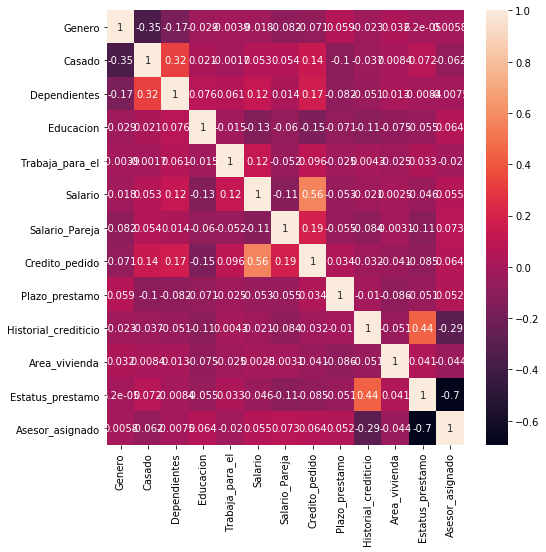

In [33]:
#Observamos la correlación entre las variables
cor=data.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(cor, annot=True)

In [34]:
#Dividimos los datos para el entrenamiento del modelo
#Quitamos la columna 'Asesor_asignado', pues no es de ayuda para el modelo
X=data.drop(columns=['Estatus_prestamo','Asesor_asignado'],axis=1)
Y=data['Estatus_prestamo']

In [35]:
#Revisamos el target
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Estatus_prestamo, dtype: int32

In [36]:
#Estandarizamos los datos
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)


In [37]:
#Separamos los datos de prueba y entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state = 10)

## Propocición de los modelos de predicción

#### Logistic Regression

In [38]:
# Modelamos usando Logistic Regresion

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

print('Training Accuracy',log_model.score(x_train,y_train)*100, '%')
print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction_log = log_model.predict(x_test)
print('\nMatriz de confusión :')
print(confusion_matrix(y_test, prediction_log))
      
print('\nMétricas de evaluación del modelo:')      
print(classification_report(y_test, prediction_log))


Training Accuracy 83.59550561797752 %
Logistic Model Accuracy :  80.35714285714286 %

Matriz de confusión :
[[ 9 17]
 [ 5 81]]

Métricas de evaluación del modelo:
              precision    recall  f1-score   support

           0       0.64      0.35      0.45        26
           1       0.83      0.94      0.88        86

    accuracy                           0.80       112
   macro avg       0.73      0.64      0.67       112
weighted avg       0.78      0.80      0.78       112



In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(5)

In [40]:
#Resultados usando cross validation
results=cross_val_score(log_model,X_scaled,Y,cv=kfold)

print('Accuracy usando cross val: ',np.mean(results)*100)

Accuracy usando cross val:  82.22329472329471


### Decission Tree

In [41]:
# Probamos Decision tree como otro modelo

from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train, y_train)

print('Decision Tree Model Accuracy : ', decision_model.score(x_test, y_test)*100, '%')

prediction_tree = decision_model.predict(x_test)
print('\nMatriz de confusión :')
print(confusion_matrix(y_test, prediction_tree))
      
print('\nMétricas de evaluación:')      
print(classification_report(y_test, prediction_tree))

Decision Tree Model Accuracy :  78.57142857142857 %

Matriz de confusión :
[[15 11]
 [13 73]]

Métricas de evaluación:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56        26
           1       0.87      0.85      0.86        86

    accuracy                           0.79       112
   macro avg       0.70      0.71      0.71       112
weighted avg       0.79      0.79      0.79       112



In [42]:
#Resultados usando cross validation
results=cross_val_score(decision_model,X_scaled,Y,cv=kfold)

print('Accuracy usando cross val para Decision tree: ',np.mean(results)*100)

Accuracy usando cross val para Decision tree:  76.48809523809523


### Red Neuronal

In [43]:
#Importamos las librerías necesarias para construir la red neuronal
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import SGD
import keras.backend as K
from keras import Sequential

Using TensorFlow backend.


In [44]:
#Creación de la red neuronal
model = Sequential()
model.add(Dense(12, input_dim=11, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [45]:
#Entrenamiento de la red neuronal
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_split = 0.1)


Train on 400 samples, validate on 45 samples
Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 0.2409 - val_loss: 0.2384
Epoch 2/50
400/400 [==============================] - 0s 505us/step - loss: 0.2107 - val_loss: 0.2129
Epoch 3/50
400/400 [==============================] - 0s 477us/step - loss: 0.1881 - val_loss: 0.1943
Epoch 4/50
400/400 [==============================] - 0s 425us/step - loss: 0.1725 - val_loss: 0.1777
Epoch 5/50
400/400 [==============================] - 0s 375us/step - loss: 0.1600 - val_loss: 0.1667
Epoch 6/50
400/400 [==============================] - 0s 427us/step - loss: 0.1519 - val_loss: 0.1562
Epoch 7/50
400/400 [==============================] - 0s 390us/step - loss: 0.1455 - val_loss: 0.1507
Epoch 8/50
400/400 [==============================] - 0s 425us/step - loss: 0.1408 - val_loss: 0.1449
Epoch 9/50
400/400 [==============================] - 0s 433us/step - loss: 0.1371 - val_loss: 0.1413
Epoch 10/50
400/400 [==================

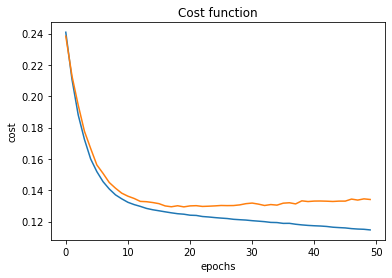

In [46]:
#Visualización del progreso del modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cost function')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()

In [50]:
#Pérdida y precisión de la red
preds = model.evaluate(x = x_test, y = y_test)

print ("Pérdida:  ",preds*100,'%')
print('Accuracy red neuronal: ',(1-preds)*100,'%')

112/112 [==============================] - 0s 80us/step
Pérdida:   14.45755170924323 %
Accuracy red neuronal:  85.54244829075677 %


In [48]:
#Traducimos las predicciones a 0 y 1
predictions_nn=model.predict(x_test)
pred=predictions_nn.squeeze()
pred_round=[]
for p in pred:
    if p<0.51:
        pred_round.append(0)
    else:
        pred_round.append(1)


In [49]:
#Métricas de evaluación para las predicciones hechas por la red
print('\nMatriz de confusión :')
print(confusion_matrix(y_test, pred_round))
      
print('\nMétricas de evaluación:')      
print(classification_report(y_test, pred_round))


Matriz de confusión :
[[ 8 18]
 [ 5 81]]

Métricas de evaluación:
              precision    recall  f1-score   support

           0       0.62      0.31      0.41        26
           1       0.82      0.94      0.88        86

    accuracy                           0.79       112
   macro avg       0.72      0.62      0.64       112
weighted avg       0.77      0.79      0.77       112

